# A linear regression learning algorithm example using TensorFlow library.

Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/


Epoch: 0050 cost= 0.077604510 W= 0.263663 b= 0.700249


Epoch: 0100 cost= 0.077532500 W= 0.262827 b= 0.706269


Epoch: 0150 cost= 0.077468865 W= 0.26204 b= 0.711931


Epoch: 0200 cost= 0.077412657 W= 0.261299 b= 0.717256


Epoch: 0250 cost= 0.077362962 W= 0.260603 b= 0.722265


Epoch: 0300 cost= 0.077319086 W= 0.259948 b= 0.726977


Epoch: 0350 cost= 0.077280343 W= 0.259332 b= 0.731407


Epoch: 0400 cost= 0.077246107 W= 0.258753 b= 0.735575


Epoch: 0450 cost= 0.077215858 W= 0.258208 b= 0.739495


Epoch: 0500 cost= 0.077189147 W= 0.257696 b= 0.743181


Epoch: 0550 cost= 0.077165574 W= 0.257214 b= 0.746648


Epoch: 0600 cost= 0.077144742 W= 0.25676 b= 0.749909


Epoch: 0650 cost= 0.077126384 W= 0.256334 b= 0.752977


Epoch: 0700 cost= 0.077110179 W= 0.255933 b= 0.755861


Epoch: 0750 cost= 0.077095844 W= 0.255556 b= 0.758575


Epoch: 0800 cost= 0.077083223 W= 0.255201 b= 0.761127


Epoch: 0850 cost= 0.077072076 W= 0.254867 b= 0.763527


Epoch: 0900 cost= 0.077062249 W= 0.254554 b= 0.765785


Epoch: 0950 cost= 0.077053584 W= 0.254259 b= 0.767907


Epoch: 1000 cost= 0.077045940 W= 0.253981 b= 0.769905
Optimization Finished!
Training cost= 0.0770459 W= 0.253981 b= 0.769905 



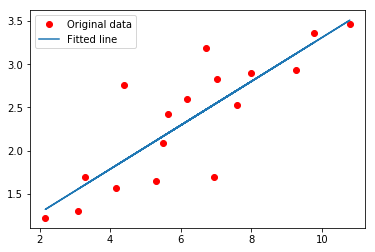

Testing... (Mean square loss Comparison)
Testing cost= 0.0783023
Absolute mean square loss difference: 0.0012564


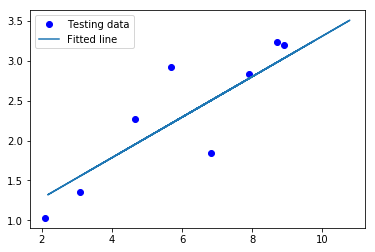

In [1]:
from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

rng = numpy.random

logs_path = './tensorflow_logs/linear'

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
                         7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1])
train_Y = numpy.asarray([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
                         2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch + 1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print("Epoch:", '%04d' % (epoch + 1), "cost=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()